In [1]:
import torch
from diffusers import StableDiffusionInpaintPipeline

pipe_inpaint = StableDiffusionInpaintPipeline.from_pretrained(
    "checkpoints/stable-diffusion-2-inpainting",
    torch_dtype=torch.float32,
).to("cpu")

/aul/homes/rsun/.conda/envs/rajaemv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00, 10.73it/s]


In [2]:
from PIL import Image, ImageDraw
# Create a base image
base_image = Image.new('RGB', (256, 256), color='white')

# Create a mask
mask = Image.new('L', (256, 256), color='black')
draw = ImageDraw.Draw(mask)
draw.rectangle([96, 96, 160, 160], fill='white')

# Generate image on CPU
output = pipe_inpaint(
    prompt="Face of a yellow cat, high resolution, sitting on a park bench", 
    image=base_image, 
    mask_image=mask,
    num_inference_steps=20,
    guidance_scale=5.0
)

# Save the result
result_image = output.images[0]
result_image.save("yellow_cat_on_park_bench_3.png")

100%|██████████| 20/20 [00:23<00:00,  1.18s/it]


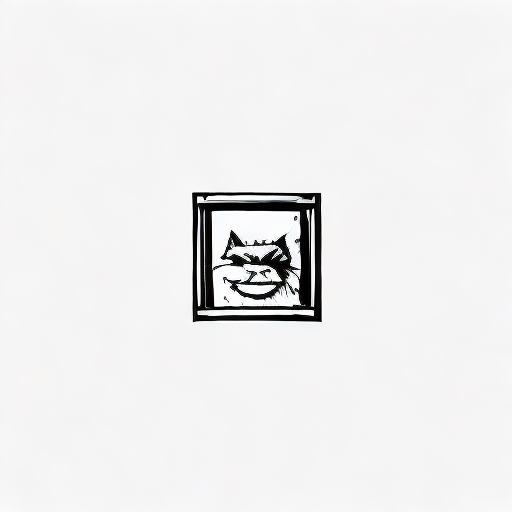

In [3]:
display(result_image)